In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/25-1 보훈공공데이터 공모전/데이터250625 데이터 합본_2')
df

,연도,월,관람객수,전시,문화,학술,교육,기타,공휴일수,맑은날_비율,...,10분최다강수량(mm),일최다강수량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),10분최다강수량 나타난날(yyyymmdd),최심적설(cm),최심신적설(cm),3시간신적설합(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd),단체관람객수
0,1988,1,295731.0,0,0,0,0,0,3,0.903226,...,1.0,19880121,19880121.0,19880121.0,2.7,1.8,8.1,19880124.0,19880124.0,15696.0
1,1988,2,237922.0,0,0,0,0,0,2,1.000000,...,0.5,19880223,19880223.0,19880223.0,0.1,0.1,0.2,19880204.0,19880204.0,86526.0
2,1988,3,425473.0,0,0,0,0,0,1,0.900000,...,1.5,19880311,19880311.0,19880311.0,4.3,4.3,9.1,19880308.0,19880308.0,71815.0
3,1988,4,717972.0,0,0,0,0,0,2,0.931034,...,2.0,19880412,19880418.0,19880418.0,NaN,NaN,NaN,NaN,NaN,196901.0
4,1988,5,736798.0,0,0,0,0,0,2,0.900000,...,2.5,19880522,19880522.0,19880522.0,NaN,NaN,NaN,NaN,NaN,262934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,2025,1,229170.0,0,0,0,0,0,5,0.677419,...,NaN,20250127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445,2025,2,200871.0,0,0,0,0,0,0,0.750000,...,NaN,20250207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,2025,3,330887.0,0,0,0,0,0,2,0.774194,...,NaN,20250303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,2025,4,275851.0,0,0,0,0,0,0,0.733333,...,1.5,20250422,20250422.0,20250422.0,NaN,NaN,NaN,NaN,NaN,NaN


### 0. DROP

In [ ]:
# 날짜 관련 컬럼 drop 진행
df_cleaned = df.drop(columns=[col for col in df.columns if '나타난날' in col])
df_cleaned

,연도,월,관람객수,전시,문화,학술,교육,기타,공휴일수,맑은날_비율,...,최고기온(°C),최저기온(°C),월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량(mm),10분최다강수량(mm),최심적설(cm),최심신적설(cm),3시간신적설합(cm),단체관람객수
0,1988,1,295731.0,0,0,0,0,0,3,0.903226,...,11.9,-13.4,9.3,5.5,2.5,1.0,2.7,1.8,8.1,15696.0
1,1988,2,237922.0,0,0,0,0,0,2,1.000000,...,12.8,-13.1,0.5,0.5,0.5,0.5,0.1,0.1,0.2,86526.0
2,1988,3,425473.0,0,0,0,0,0,1,0.900000,...,18.0,-7.3,42.4,31.5,5.0,1.5,4.3,4.3,9.1,71815.0
3,1988,4,717972.0,0,0,0,0,0,2,0.931034,...,25.6,-1.0,50.4,23.5,7.5,2.0,NaN,NaN,NaN,196901.0
4,1988,5,736798.0,0,0,0,0,0,2,0.900000,...,30.2,4.8,58.3,37.0,11.5,2.5,NaN,NaN,NaN,262934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,2025,1,229170.0,0,0,0,0,0,5,0.677419,...,9.9,-17.2,8.0,2.5,NaN,NaN,NaN,NaN,NaN,NaN
445,2025,2,200871.0,0,0,0,0,0,0,0.750000,...,14.7,-16.5,13.2,6.1,NaN,NaN,NaN,NaN,NaN,NaN
446,2025,3,330887.0,0,0,0,0,0,2,0.774194,...,26.9,-4.5,49.5,30.7,NaN,NaN,NaN,NaN,NaN,NaN
447,2025,4,275851.0,0,0,0,0,0,0,0.733333,...,27.2,-1.4,61.9,27.7,6.4,1.5,NaN,NaN,NaN,NaN


In [ ]:
df_cleaned = df_cleaned.dropna(subset=['연도', '월']) # 연도, 월이 NULL인 row drop
df_cleaned.drop(columns = ['지점', '지점명'], inplace = True) # 지점, 지점명 등 인덱스 컬럼 drop
df_cleaned

,연도,월,관람객수,전시,문화,학술,교육,기타,공휴일수,맑은날_비율,...,최고기온(°C),최저기온(°C),월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량(mm),10분최다강수량(mm),최심적설(cm),최심신적설(cm),3시간신적설합(cm),단체관람객수
0,1988,1,295731.0,0,0,0,0,0,3,0.903226,...,11.9,-13.4,9.3,5.5,2.5,1.0,2.7,1.8,8.1,15696.0
1,1988,2,237922.0,0,0,0,0,0,2,1.000000,...,12.8,-13.1,0.5,0.5,0.5,0.5,0.1,0.1,0.2,86526.0
2,1988,3,425473.0,0,0,0,0,0,1,0.900000,...,18.0,-7.3,42.4,31.5,5.0,1.5,4.3,4.3,9.1,71815.0
3,1988,4,717972.0,0,0,0,0,0,2,0.931034,...,25.6,-1.0,50.4,23.5,7.5,2.0,NaN,NaN,NaN,196901.0
4,1988,5,736798.0,0,0,0,0,0,2,0.900000,...,30.2,4.8,58.3,37.0,11.5,2.5,NaN,NaN,NaN,262934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,2025,1,229170.0,0,0,0,0,0,5,0.677419,...,9.9,-17.2,8.0,2.5,NaN,NaN,NaN,NaN,NaN,NaN
445,2025,2,200871.0,0,0,0,0,0,0,0.750000,...,14.7,-16.5,13.2,6.1,NaN,NaN,NaN,NaN,NaN,NaN
446,2025,3,330887.0,0,0,0,0,0,2,0.774194,...,26.9,-4.5,49.5,30.7,NaN,NaN,NaN,NaN,NaN,NaN
447,2025,4,275851.0,0,0,0,0,0,0,0.733333,...,27.2,-1.4,61.9,27.7,6.4,1.5,NaN,NaN,NaN,NaN


### 1. 기본 전처리

In [ ]:
# 계절성 반영하기 위해 월별 sin, cos 값 컬럼으로 추가

df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['월'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['월'] / 12)
df_cleaned

,연도,월,관람객수,전시,문화,학술,교육,기타,공휴일수,맑은날_비율,...,월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량(mm),10분최다강수량(mm),최심적설(cm),최심신적설(cm),3시간신적설합(cm),단체관람객수,month_sin,month_cos
0,1988,1,295731.0,0,0,0,0,0,3,0.903226,...,9.3,5.5,2.5,1.0,2.7,1.8,8.1,15696.0,0.500000,8.660254e-01
1,1988,2,237922.0,0,0,0,0,0,2,1.000000,...,0.5,0.5,0.5,0.5,0.1,0.1,0.2,86526.0,0.866025,5.000000e-01
2,1988,3,425473.0,0,0,0,0,0,1,0.900000,...,42.4,31.5,5.0,1.5,4.3,4.3,9.1,71815.0,1.000000,6.123234e-17
3,1988,4,717972.0,0,0,0,0,0,2,0.931034,...,50.4,23.5,7.5,2.0,NaN,NaN,NaN,196901.0,0.866025,-5.000000e-01
4,1988,5,736798.0,0,0,0,0,0,2,0.900000,...,58.3,37.0,11.5,2.5,NaN,NaN,NaN,262934.0,0.500000,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,2025,1,229170.0,0,0,0,0,0,5,0.677419,...,8.0,2.5,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,8.660254e-01
445,2025,2,200871.0,0,0,0,0,0,0,0.750000,...,13.2,6.1,NaN,NaN,NaN,NaN,NaN,NaN,0.866025,5.000000e-01
446,2025,3,330887.0,0,0,0,0,0,2,0.774194,...,49.5,30.7,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6.123234e-17
447,2025,4,275851.0,0,0,0,0,0,0,0.733333,...,61.9,27.7,6.4,1.5,NaN,NaN,NaN,NaN,0.866025,-5.000000e-01


### 2. 결측치 확인

In [ ]:
pip install missingno

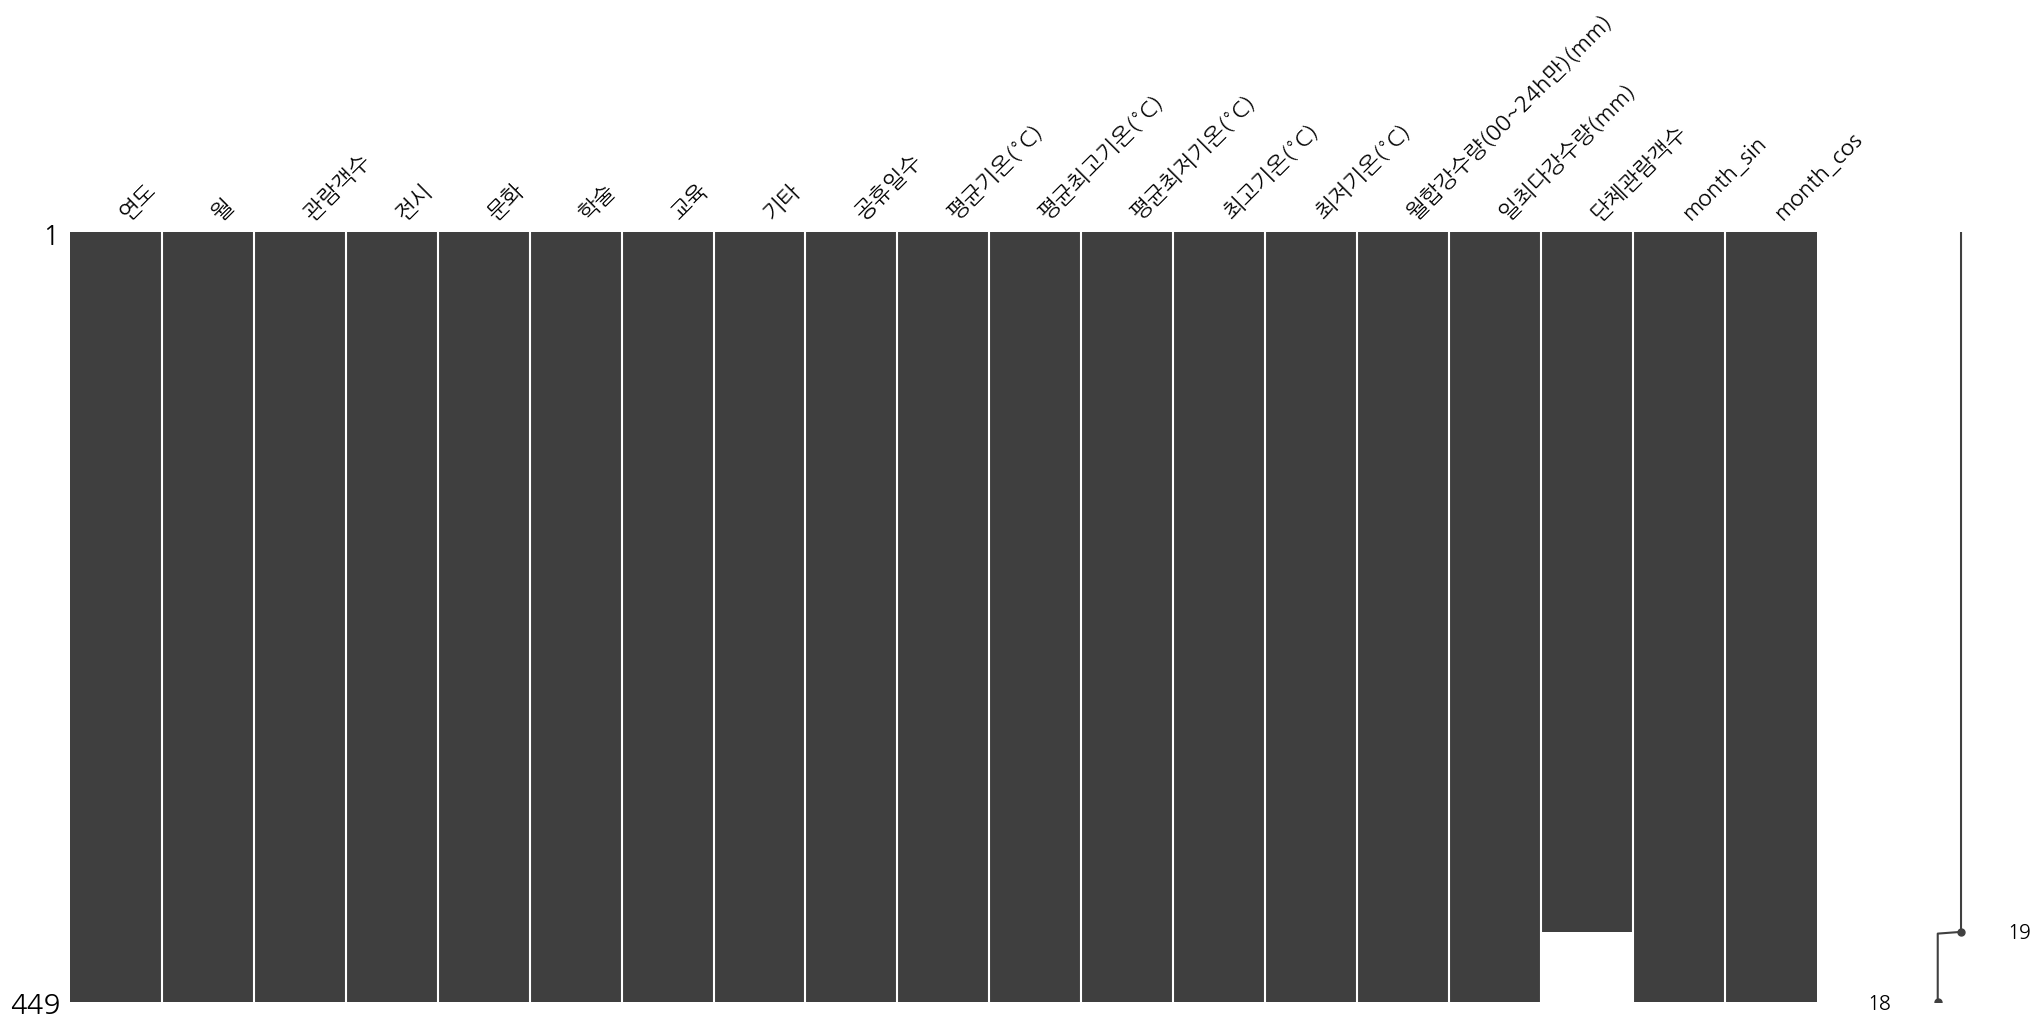

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df_cleaned)
plt.show()

In [ ]:
# 결측치가 많은 컬럼들은 drop 진행
df_cleaned = df_cleaned.drop(columns = ['1시간최다강수량(mm)', '10분최다강수량(mm)', '최심적설(cm)', '최심신적설(cm)', '3시간신적설합(cm)'])
df_cleaned

,연도,월,관람객수,전시,문화,학술,교육,기타,공휴일수,맑은날_비율,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),월합강수량(00~24h만)(mm),일최다강수량(mm),단체관람객수,month_sin,month_cos
0,1988,1,295731.0,0,0,0,0,0,3,0.903226,-2.0,3.3,-6.9,11.9,-13.4,9.3,5.5,15696.0,0.500000,8.660254e-01
1,1988,2,237922.0,0,0,0,0,0,2,1.000000,-1.7,4.6,-7.1,12.8,-13.1,0.5,0.5,86526.0,0.866025,5.000000e-01
2,1988,3,425473.0,0,0,0,0,0,1,0.900000,3.3,9.5,-1.9,18.0,-7.3,42.4,31.5,71815.0,1.000000,6.123234e-17
3,1988,4,717972.0,0,0,0,0,0,2,0.931034,10.7,18.4,3.6,25.6,-1.0,50.4,23.5,196901.0,0.866025,-5.000000e-01
4,1988,5,736798.0,0,0,0,0,0,2,0.900000,17.3,24.5,10.8,30.2,4.8,58.3,37.0,262934.0,0.500000,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,2025,1,229170.0,0,0,0,0,0,5,0.677419,-1.3,4.4,-6.5,9.9,-17.2,8.0,2.5,NaN,0.500000,8.660254e-01
445,2025,2,200871.0,0,0,0,0,0,0,0.750000,-1.8,4.1,-7.8,14.7,-16.5,13.2,6.1,NaN,0.866025,5.000000e-01
446,2025,3,330887.0,0,0,0,0,0,2,0.774194,7.2,13.8,0.7,26.9,-4.5,49.5,30.7,NaN,1.000000,6.123234e-17
447,2025,4,275851.0,0,0,0,0,0,0,0.733333,12.8,20.2,5.4,27.2,-1.4,61.9,27.7,NaN,0.866025,-5.000000e-01


In [ ]:
df_cleaned[df_cleaned['맑은날_비율'].isna()]

# 맑은날_비율 2016.12 ~ 2018.5까지 결측치 존재해서 drop 결정
df_cleaned.drop(columns = '맑은날_비율', inplace = True)

KeyError: '맑은날_비율'

In [ ]:
df_cleaned.to_csv("final.csv", index = False)

### 3. EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/25-1 보훈공공데이터 공모전/250625 final.csv')
df

,연도,월,관람객수,전시,문화,학술,교육,기타,공휴일수,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),월합강수량(00~24h만)(mm),일최다강수량(mm),단체관람객수,month_sin,month_cos
0,1988,1,295731.0,0,0,0,0,0,3,-2.0,3.3,-6.9,11.9,-13.4,9.3,5.5,15696.0,0.500000,8.660254e-01
1,1988,2,237922.0,0,0,0,0,0,2,-1.7,4.6,-7.1,12.8,-13.1,0.5,0.5,86526.0,0.866025,5.000000e-01
2,1988,3,425473.0,0,0,0,0,0,1,3.3,9.5,-1.9,18.0,-7.3,42.4,31.5,71815.0,1.000000,6.123234e-17
3,1988,4,717972.0,0,0,0,0,0,2,10.7,18.4,3.6,25.6,-1.0,50.4,23.5,196901.0,0.866025,-5.000000e-01
4,1988,5,736798.0,0,0,0,0,0,2,17.3,24.5,10.8,30.2,4.8,58.3,37.0,262934.0,0.500000,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,2025,1,229170.0,0,0,0,0,0,5,-1.3,4.4,-6.5,9.9,-17.2,8.0,2.5,NaN,0.500000,8.660254e-01
445,2025,2,200871.0,0,0,0,0,0,0,-1.8,4.1,-7.8,14.7,-16.5,13.2,6.1,NaN,0.866025,5.000000e-01
446,2025,3,330887.0,0,0,0,0,0,2,7.2,13.8,0.7,26.9,-4.5,49.5,30.7,NaN,1.000000,6.123234e-17
447,2025,4,275851.0,0,0,0,0,0,0,12.8,20.2,5.4,27.2,-1.4,61.9,27.7,NaN,0.866025,-5.000000e-01


#### 1) 관람객수 트렌드 분석

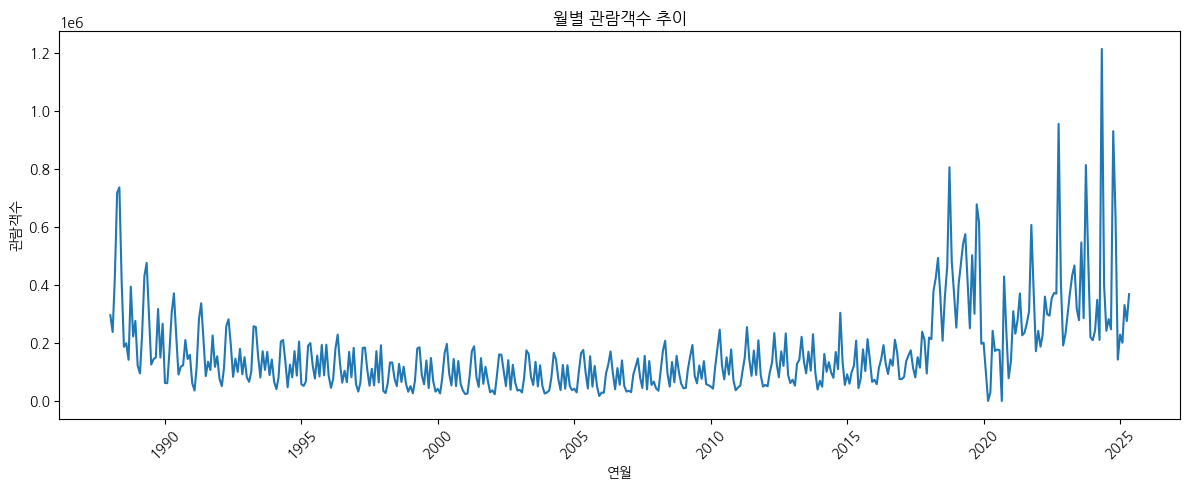

In [ ]:
df['연월'] = pd.to_datetime(
    df['연도'].astype(int).astype(str) + '-' + df['월'].astype(int).astype(str).str.zfill(2)
)

plt.figure(figsize=(12, 5))
plt.plot(df['연월'], df['관람객수'])
plt.title("월별 관람객수 추이")
plt.xlabel("연월")
plt.ylabel("관람객수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2) 공휴일수와 관람객수 관계 확인

<Axes: xlabel='공휴일수', ylabel='관람객수'>

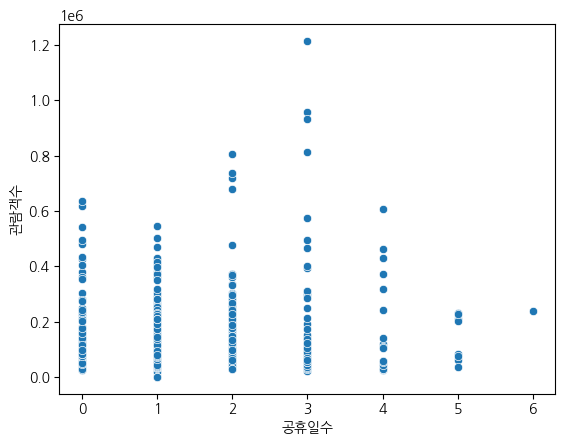

In [ ]:
sns.scatterplot(data=df, x='공휴일수', y='관람객수')

In [ ]:
df[['공휴일수', '관람객수']].corr()

,공휴일수,관람객수
공휴일수,1.000000,0.101791
관람객수,0.101791,1.000000


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(df['공휴일수'])
y = df['관람객수']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   관람객수   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.680
Date:                Wed, 25 Jun 2025   Prob (F-statistic):             0.0310
Time:                        11:01:51   Log-Likelihood:                -5983.4
No. Observations:                 449   AIC:                         1.197e+04
Df Residuals:                     447   BIC:                         1.198e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.488e+05   1.11e+04     13.417      0.0

#### 3) 상관계수 확인

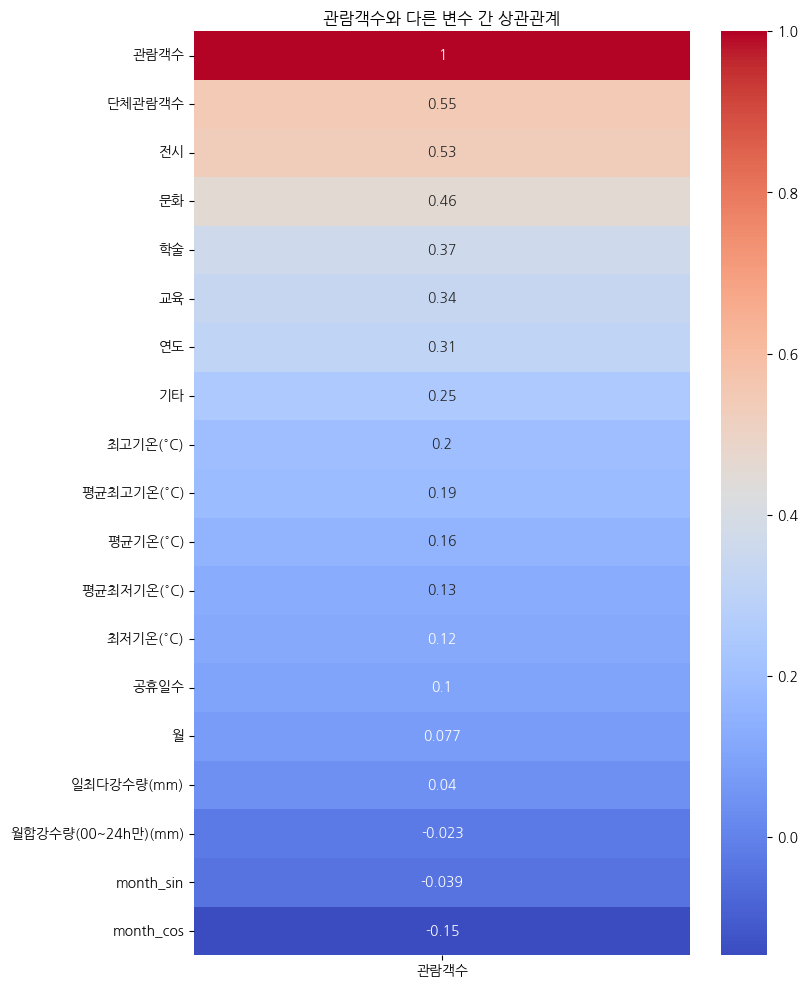

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 12))
sns.heatmap(corr[['관람객수']].sort_values(by='관람객수', ascending=False), annot=True, cmap='coolwarm')
plt.title("관람객수와 다른 변수 간 상관관계")
plt.show()

#### 4) '관람객수' 다중 회귀
- 관람객수와 상관관계가 높은 컬럼들을 위주로 선택

In [ ]:
selected_features = [
    '전시', '문화', '교육', '학술', '기타',
    '최고기온(°C)', '평균최고기온(°C)', '평균기온(°C)', '평균최저기온(°C)'
]

In [ ]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[selected_features]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

      feature          VIF
0          전시     3.301694
1          문화     1.694353
2          교육     1.786803
3          학술     2.336026
4          기타     1.217519
5    최고기온(°C)   157.286618
6  평균최고기온(°C)  2269.553649
7    평균기온(°C)  5164.528104
8  평균최저기온(°C)   859.252384


In [ ]:
import statsmodels.api as sm

features = [
    '전시', '문화', '교육', '학술', '기타',
    '평균기온(°C)'
]

X = df[features]
y = df['관람객수']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   관람객수   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     36.85
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           3.32e-36
Time:                        11:02:59   Log-Likelihood:                -5894.7
No. Observations:                 449   AIC:                         1.180e+04
Df Residuals:                     442   BIC:                         1.183e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.133e+05   9460.885     11.975      0.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
import ast
import joblib
import xgboost as xgb
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

## 최종 데이터셋

In [2]:
df = pd.read_csv("관람객수_축제_병합데이터.csv")
df

,연도,월,관람객수,단체관람객수,전시,문화,학술,교육,기타,공휴일수,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),월합강수량(00~24h만)(mm),일최다강수량(mm),month_sin,month_cos,총축제방문객수
0,1988.0,1.0,295731.0,15696,0.0,0.0,0.0,0.0,0.0,3.0,-2.0,3.3,-6.9,11.9,-13.4,9.3,5.5,5.000000e-01,8.660254e-01,0.000000
1,1988.0,2.0,237922.0,86526,0.0,0.0,0.0,0.0,0.0,2.0,-1.7,4.6,-7.1,12.8,-13.1,0.5,0.5,8.660254e-01,5.000000e-01,0.000000
2,1988.0,3.0,425473.0,71815,0.0,0.0,0.0,0.0,0.0,1.0,3.3,9.5,-1.9,18.0,-7.3,42.4,31.5,1.000000e+00,6.123234e-17,0.000000
3,1988.0,4.0,717972.0,196901,0.0,0.0,0.0,0.0,0.0,2.0,10.7,18.4,3.6,25.6,-1.0,50.4,23.5,8.660254e-01,-5.000000e-01,0.000000
4,1988.0,5.0,736798.0,262934,0.0,0.0,0.0,0.0,0.0,2.0,17.3,24.5,10.8,30.2,4.8,58.3,37.0,5.000000e-01,-8.660254e-01,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2021.0,8.0,267294.0,4747,85.0,0.0,11.0,85.0,0.0,2.0,24.3,28.8,20.8,33.8,17.8,230.0,68.4,-8.660254e-01,-5.000000e-01,14516.666667
404,2021.0,9.0,309856.0,5471,92.0,0.0,0.0,92.0,0.0,3.0,20.9,25.9,16.8,28.9,12.9,250.8,117.1,-1.000000e+00,-1.836970e-16,630000.000000
405,2021.0,10.0,607045.0,8655,106.0,5.0,5.0,106.0,0.0,4.0,14.0,20.5,8.9,28.7,-1.2,49.5,13.4,-8.660254e-01,5.000000e-01,310000.000000
406,2021.0,11.0,377663.0,8443,84.0,12.0,8.0,84.0,0.0,0.0,6.9,13.8,1.6,21.1,-5.1,67.9,26.5,-5.000000e-01,8.660254e-01,16750.000000


### 시계열 - 1년 단위로 반복

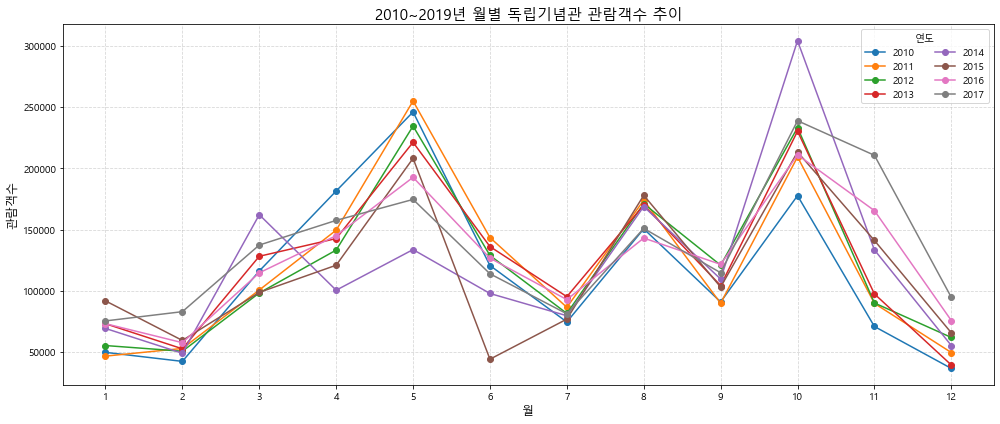

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 연도, 월 정수형 변환
df['연도'] = df['연도'].astype(int)
df['월'] = df['월'].astype(int)

# 2010~2019년 필터링
df_filtered = df[(df['연도'] >= 2010) & (df['연도'] <= 2017)]

# 피벗: 연도별 월별 관람객수
pivot_df = df_filtered.pivot(index='월', columns='연도', values='관람객수')

# 시각화
plt.figure(figsize=(14, 6))
for col in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[col], marker='o', label=f'{col}')

plt.title('2010~2019년 월별 독립기념관 관람객수 추이', fontsize=15)
plt.xlabel('월', fontsize=12)
plt.ylabel('관람객수', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='연도', loc='upper right', ncol=2)
plt.tight_layout()
plt.show()


In [4]:
# 2010~2015년 필터링
df_filtered = df_filtered[(df_filtered['연도'] >= 2010) & (df_filtered['연도'] <= 2015)]

# 결측치 제거
df_filtered = df_filtered.dropna(subset=['연도', '월'])

# 정수형 변환
df_filtered['연도'] = df_filtered['연도'].astype(int)
df_filtered['월'] = df_filtered['월'].astype(int)

# 날짜 열 생성 (확실하게)
df_filtered['날짜'] = pd.to_datetime({'year': df_filtered['연도'], 'month': df_filtered['월'], 'day': 1})


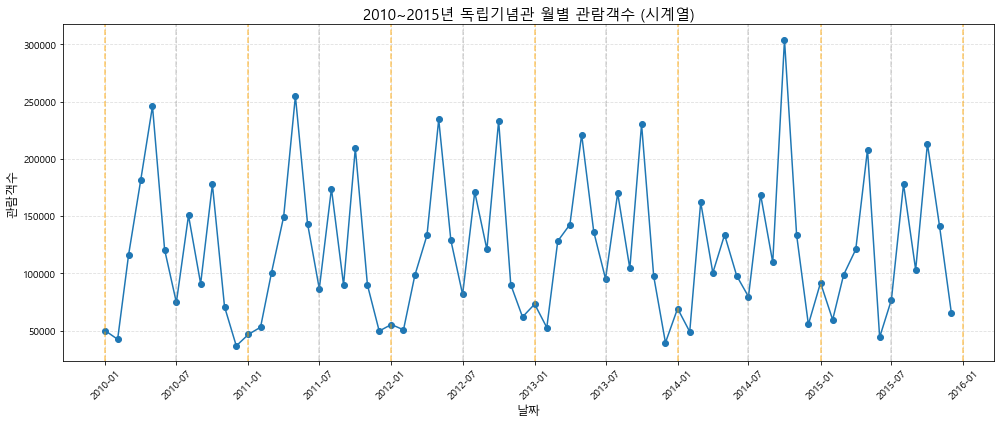

In [5]:


# 시각화
plt.figure(figsize=(14, 6))
plt.plot(df_filtered['날짜'], df_filtered['관람객수'], marker='o', linestyle='-')
plt.title('2010~2015년 독립기념관 월별 관람객수 (시계열)', fontsize=15)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('관람객수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# 1월, 7월만 x축 라벨로 설정
ax = plt.gca()
locator = mdates.MonthLocator(bymonth=[1, 7])
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 수직 점선 추가
for tick in ax.get_xticks():
    date = mdates.num2date(tick)
    if date.month == 1:
        ax.axvline(x=tick, color='orange', linestyle='--', alpha=0.6)
    else:
        ax.axvline(x=tick, color='gray', linestyle='--', alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 비교용 데이터

In [6]:
mobile = pd.read_csv("(전국_관광지)모바일인구이동_원자료.csv")
mobile

,Date,전체,전체 4주 이동평균,관광지
0,2020-01-05,109807892,109807892,2233416
1,2020-01-12,108597056,109202474,2016381
2,2020-01-19,109202578,109202509,2046574
3,2020-01-26,108692517,109075011,2098270
4,2020-02-02,104908872,107850256,1920291
...,...,...,...,...
279,2025-05-11,121913678,123809725,2535118
280,2025-05-18,121189278,123231828,2338206
281,2025-05-25,122409681,122814987,2354000
282,2025-06-01,121482019,121748664,2351120


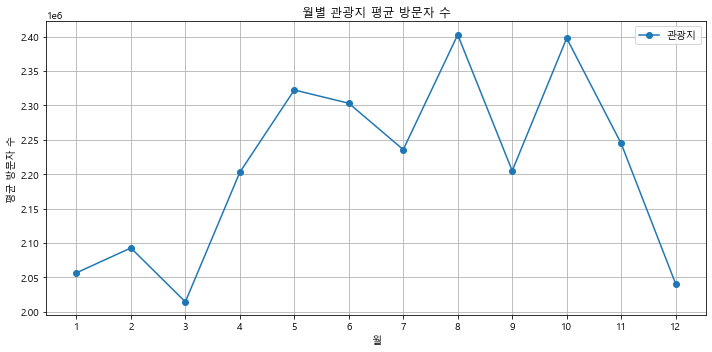

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 날짜를 datetime 형식으로 변환
mobile['Date'] = pd.to_datetime(mobile['Date'])

# 월만 추출
mobile['Month'] = mobile['Date'].dt.month

# 월별 관광지 평균 계산
monthly_avg = mobile.groupby('Month')['관광지'].mean().reset_index()

# 그래프 그리기
monthly_avg.plot(x='Month', y='관광지', kind='line', marker='o', figsize=(10, 5))
plt.title('월별 관광지 평균 방문자 수')
plt.xlabel('월')
plt.ylabel('평균 방문자 수')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()


## 날씨 데이터

In [8]:
weather = pd.read_csv("천안_날씨정보.csv", encoding = 'cp949')
weather

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),...,1시간최다강수량(mm),10분최다강수량(mm),일최다강수량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),10분최다강수량 나타난날(yyyymmdd),최심적설(cm),최심신적설(cm),3시간신적설합(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd)
0,232,천안,1988-01,-2.0,3.3,-6.9,11.9,-13.4,19880114,19880124,...,2.5,1.0,19880121,19880121.0,19880121.0,2.7,1.8,8.1,19880124.0,19880124.0
1,232,천안,1988-02,-1.7,4.6,-7.1,12.8,-13.1,19880227,19880208,...,0.5,0.5,19880223,19880223.0,19880223.0,0.1,0.1,0.2,19880204.0,19880204.0
2,232,천안,1988-03,3.3,9.5,-1.9,18.0,-7.3,19880313,19880304,...,5.0,1.5,19880311,19880311.0,19880311.0,4.3,4.3,9.1,19880308.0,19880308.0
3,232,천안,1988-04,10.7,18.4,3.6,25.6,-1.0,19880430,19880410,...,7.5,2.0,19880412,19880418.0,19880418.0,NaN,NaN,NaN,NaN,NaN
4,232,천안,1988-05,17.3,24.5,10.8,30.2,4.8,19880520,19880506,...,11.5,2.5,19880522,19880522.0,19880522.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,232,천안,2025-02,-1.8,4.1,-7.8,14.7,-16.5,20250227,20250208,...,NaN,NaN,20250207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,232,천안,2025-03,7.2,13.8,0.7,26.9,-4.5,20250326,20250330,...,NaN,NaN,20250303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,232,천안,2025-04,12.8,20.2,5.4,27.2,-1.4,20250417,20250401,...,6.4,1.5,20250422,20250422.0,20250422.0,NaN,NaN,NaN,NaN,NaN
448,232,천안,2025-05,16.5,22.8,10.4,30.0,3.4,20250521,20250504,...,10.5,4.5,20250501,20250501.0,20250501.0,NaN,NaN,NaN,NaN,NaN


In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   지점                       450 non-null    int64  
 1   지점명                      450 non-null    object 
 2   일시                       450 non-null    object 
 3   평균기온(°C)                 449 non-null    float64
 4   평균최고기온(°C)               449 non-null    float64
 5   평균최저기온(°C)               449 non-null    float64
 6   최고기온(°C)                 450 non-null    float64
 7   최저기온(°C)                 450 non-null    float64
 8   최고기온 나타난날(yyyymmdd)      450 non-null    int64  
 9   최저기온 나타난날(yyyymmdd)      450 non-null    int64  
 10  월합강수량(00~24h만)(mm)       450 non-null    float64
 11  일최다강수량(mm)               450 non-null    float64
 12  1시간최다강수량(mm)             283 non-null    float64
 13  10분최다강수량(mm)             284 non-null    float64
 14  일최다강수량 나타난날(yyyymmdd)    4

### 날씨 간 상관관계 및 vif 확인

C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\User\AppData\Local\Temp\ipykernel_37696\4093637141.py:16: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


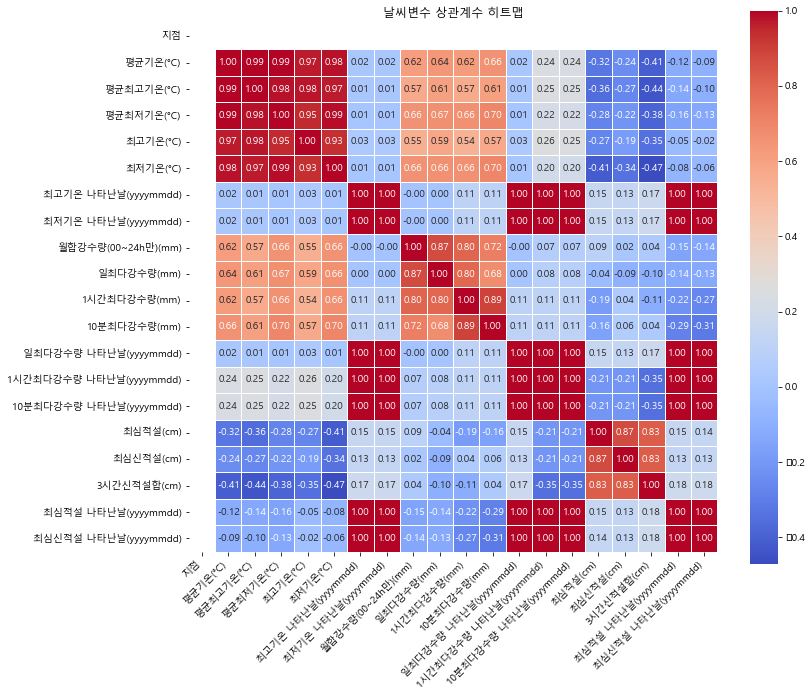

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 숫자형 컬럼만 선택 (상관계수는 수치형만 해당)
weather_numeric = weather.select_dtypes(include='number')

# 2. 상관계수 행렬 계산
corr_matrix = weather_numeric.corr()

# 3. 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("날씨변수 상관계수 히트맵")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.float_format = '{:.3f}'.format

# 1. 수치형 컬럼만 선택
X = weather.select_dtypes(include='number').dropna()

# 2. 상수항 추가
X_const = sm.add_constant(X, has_constant='add')

# 3. VIF 계산
vif_values = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif_df = pd.DataFrame({
    "변수명": X_const.columns,
    "VIF": vif_values
})

# 4. 결과 출력
print("\n[📌 weather 모든 수치형 변수에 대한 VIF]")
print(vif_df.round(3))



[📌 weather 모든 수치형 변수에 대한 VIF]
                        변수명                  VIF
0                     const                0.000
1                        지점                0.000
2                  평균기온(°C)                  inf
3                평균최고기온(°C)                  inf
4                평균최저기온(°C)                  inf
5                  최고기온(°C) 9007199254740992.000
6                  최저기온(°C)                  inf
7       최고기온 나타난날(yyyymmdd)    2699190666688.940
8       최저기온 나타난날(yyyymmdd)    4197203753374.180
9        월합강수량(00~24h만)(mm)                  inf
10               일최다강수량(mm)                  inf
11             1시간최다강수량(mm)                  inf
12             10분최다강수량(mm)                  inf
13    일최다강수량 나타난날(yyyymmdd)     917230066674.236
14  1시간최다강수량 나타난날(yyyymmdd)   25019997929836.090
15  10분최다강수량 나타난날(yyyymmdd)    8402238110765.851
16                 최심적설(cm)                  inf
17                최심신적설(cm)                  inf
18              3시간신적설합(cm)           

C:\Users\User\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\User\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


## 축제 데이터

In [12]:
festival = pd.read_excel("천안시축제_1725(계획서).xlsx", sheet_name="Sheet1")
festival

,년도,월,축제명,개최 주기,최초 개최연도,전년도_방문객수
0,2017,4,천안북면위례벚꽃축제,매년,2013,20000
1,2017,4,대학아트페스티벌,매년,2017,10000
2,2017,5,청바지페스티벌,매년,2017,2000
3,2017,9,천안흥타령춤축제,매년,2003,1200000
4,2017,9,입장거봉포도축제,기타,1993,3100
5,2017,10,천안호두축제,매년,2006,1000
6,2017,10,천안예술제,매년,2004,30000
7,2017,10,천안성환배축제,매년,1996,3000
8,2018,9,천안흥타령춤축제,매년,2003,125000
9,2018,5,청바지페스티벌,매년,2017,5000


In [13]:
# 전처리: 쉼표, '명', 공백 제거 후 숫자로 변환
festival['전년도_방문객수'] = (
    festival['전년도_방문객수']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('명', '', regex=False)
    .str.strip()
)

# 숫자형으로 강제 변환, 실패한 건 NaN으로
festival['전년도_방문객수'] = pd.to_numeric(festival['전년도_방문객수'], errors='coerce')


# 월별 축제 수 & 방문객수 집계
monthly_festival = festival.groupby('월').agg({
    '축제명': 'count',
    '전년도_방문객수': 'mean'
}).reset_index().rename(columns={'축제명': '축제수', '전년도_방문객수': '예상방문객수'})

monthly_festival 


,월,축제수,예상방문객수
0,4,11,17388.889
1,5,2,3500.000
2,9,15,188238.462
3,10,13,130000.000
4,11,1,280000.000


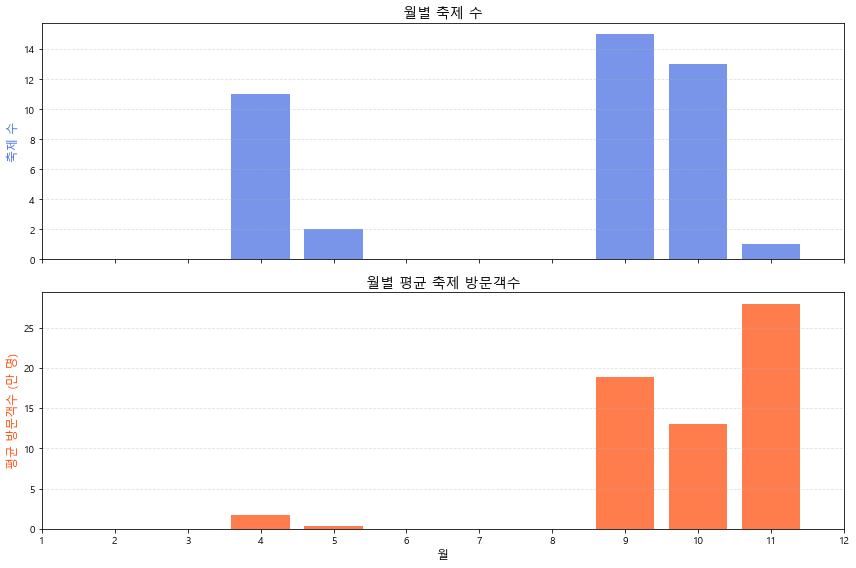

In [14]:
import matplotlib.pyplot as plt

# 단위 변환
monthly_festival['예상방문객수(만)'] = monthly_festival['예상방문객수'] / 10000

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [1, 1]})

# 위: 축제 수
ax1.bar(monthly_festival['월'], monthly_festival['축제수'], color='royalblue', alpha=0.7)
ax1.set_ylabel('축제 수', fontsize=12, color='royalblue')
ax1.set_title('월별 축제 수', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# 아래: 평균 축제 방문객수 (만 명 단위)
ax2.bar(monthly_festival['월'], monthly_festival['예상방문객수(만)'], color='orangered', alpha=0.7)
ax2.set_ylabel('평균 방문객수 (만 명)', fontsize=12, color='orangered')
ax2.set_title('월별 평균 축제 방문객수', fontsize=14)
ax2.grid(axis='y', linestyle='--', alpha=0.4)

# 공통 X축
ax2.set_xlabel('월', fontsize=12)
ax2.set_xticks(range(1, 13))

plt.tight_layout()
plt.show()
